In [ ]:
#机器学习实战2022-02-13
#第二章：k-近邻算法

In [4]:
from numpy import *
import operator

In [24]:
def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels

In [25]:
group,labels = createDataSet()

In [26]:
dataSet = group
inX = [0,0]

In [16]:
dataSetSize = dataSet.shape[0]
diffMat = tile(inX,(dataSetSize,1)) - dataSet

In [17]:
sqDiffMat = diffMat**2

In [18]:
sqDiffMat

array([[1.  , 1.21],
       [1.  , 1.  ],
       [0.  , 0.  ],
       [0.  , 0.01]])

In [19]:
sqDistance = sqDiffMat.sum(axis=1)

In [20]:
sqDistance

array([2.21, 2.  , 0.  , 0.01])

In [21]:
distances = sqDistance**0.5

In [22]:
sortedDistIndicies = distances.argsort()

In [23]:
sortedDistIndicies

array([2, 3, 1, 0], dtype=int64)

In [24]:
classCount = {}

In [25]:
for i in range(3):
    voteIlabel = labels[sortedDistIndicies[i]]
    classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1

In [26]:
classCount

{'B': 2, 'A': 1}

In [28]:
sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)

In [30]:
sortedClassCount[0][0]

'B'

In [22]:
#k-近邻算法的程序片段
def classify0(inX,dataSet,labels,k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX,(dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistance = sqDiffMat.sum(axis=1)
    distances = sqDistance**0.5
    sortedDistIndicies = distances.argsort()
    
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

In [23]:
classify0([0,2],group,labels,3)

NameError: name 'group' is not defined

In [ ]:
#约会网址的配对程序

In [7]:
data_file = './《机器学习实战》Python3代码/machinelearninginaction3x-master/Ch02/datingTestSet2.txt'

In [8]:
def file2matrix(filename):
    fr = open(data_file)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = zeros((numberOfLines,3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()    #截取回车符
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1    
    return returnMat,classLabelVector

In [9]:
datingDataMat,datingLabels = file2matrix(data_file)

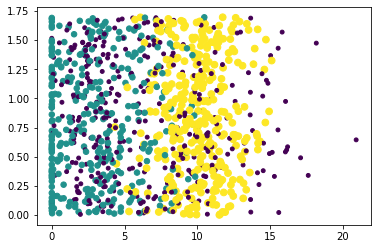

In [10]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()

In [28]:
def autoNorm(datingDataMat):
    
    minvals = datingDataMat.min(0)
    maxvals = datingDataMat.max(0)
    ranges = maxvals - minvals
    normDataSet = zeros(shape(datingDataMat))
    m = datingDataMat.shape[0]
    normDataSet = datingDataMat - tile(minvals,(m,1))
    normDataSet = normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minvals

In [29]:
normMat,ranges,minVals = autoNorm(datingDataMat)

In [35]:
def datingClassTest():
    hoRatio = 0.1
    datingDataMat,datingLabels = file2matrix(data_file)
    normMat,ranges,minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
#         print("the classifier came back with: %d, the real answer is: %d"\
#              %(classifierResult,datingLabels[i]))
        if (classifierResult != datingLabels[i]): 
            errorCount += 1.0
    print("the total error rate is:%f" %(errorCount/float(numTestVecs)))

In [37]:
datingClassTest()

the total error rate is:0.050000


In [5]:
#手写识别系统
def img2vector(filename):
    returnVect = zeros((1,1024))
    file = open(filename)
    for i in range(32):
        lineStr = file.readline()
        for j in range(32):
            returnVect[0,i*32 + j] = int(lineStr[j])
    return returnVect

In [18]:
data_file = './《机器学习实战》Python3代码/machinelearninginaction3x-master/Ch02/digits/'

In [7]:
testVect = img2vector(data_file)

In [10]:
from os import listdir

In [14]:
hwLabels = []
trainingFileList = listdir('%strainingDigits'%data_file)
m = len(trainingFileList)
trainingMat = zeros((m,1024))
for i in range(m):
    fileNameStr = trainingFileList[i]
    fileStr = fileNameStr.split('.')[0]
    classNumStr = int(fileStr.split('_')[0])
    hwLabels.append(classNumStr)
    trainingMat[i,:] = img2vector('%strainingDigits/%s'%(data_file,fileNameStr))

In [20]:
testFileList = listdir('%stestDigits'%data_file)

In [27]:
errorCount = 0.0
mTest = len(testFileList)
for i in range(mTest):
    fileNameStr = testFileList[i]
    fileStr = fileNameStr.split('.')[0]
    classNumStr = int(fileStr.split('_')[0])
    vectorUnderTest = img2vector('%stestDigits/%s'%(data_file,fileNameStr))
    classifierResult = classify0(vectorUnderTest,trainingMat,hwLabels,3)
    if (classifierResult != classNumStr): errorCount += 1.0
print('\ntotal error rate is: %f'%(errorCount/float(mTest)))


total error rate is: 0.010571
